In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = pd.read_csv("Flipkart Reviews Sentiment.csv")

# Ensure required columns exist
if 'Review' not in data.columns or 'sentiment' not in data.columns:
    raise ValueError("The dataset does not contain the required columns: 'Review' and 'sentiment'.")

# Feature extraction
X = data['Review']  # Text data
y = data['sentiment']  # Target variable

# Convert text to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7044\946139685.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Flipkart Reviews Sentiment.csv")


Model Accuracy: 0.9849485336958633
Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.95      0.97      4615
           0       0.98      0.94      0.96      2570
           1       0.98      1.00      0.99     23709

    accuracy                           0.98     30894
   macro avg       0.99      0.96      0.97     30894
weighted avg       0.99      0.98      0.98     30894

Confusion Matrix:
 [[ 4362     4   249]
 [    5  2404   161]
 [   10    36 23663]]


In [2]:
import numpy as np
import csv

# Load dataset safely
file_path = "Flipkart Reviews Sentiment.csv"

data = []
labels = []

with open(file_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip header
    for row in reader:
        if len(row) < 2:  # Ensure valid row
            continue
        try:
            # Convert numeric columns, replace non-numeric values with 0
            features = [float(value) if value.replace('.', '', 1).isdigit() else 0.0 for value in row[:-1]]
            
            # Convert sentiment labels (-1, 0, 1)
            label = row[-1].strip().lower()
            if label in ["positive", "1"]:
                label = 1
            elif label in ["negative", "-1"]:
                label = 0
            elif label == "neutral":
                label = 0  # You can change this based on dataset
            else:
                continue  # Skip invalid labels
            
            data.append(features)
            labels.append(label)
        except ValueError:
            continue  # Skip invalid rows

# Convert lists to numpy arrays
if len(data) == 0:
    raise ValueError("Dataset processing resulted in an empty feature matrix. Check CSV format!")

X = np.array(data)
y = np.array(labels).reshape(-1, 1)  # Reshape for matrix operations

# Handle missing or constant columns
std_dev = np.std(X, axis=0)
valid_columns = std_dev > 0  # Avoid division by zero
X = X[:, valid_columns]  # Keep only valid columns

# Normalize features safely (avoid division by zero)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_std[X_std == 0] = 1  # Prevent division by zero
X = (X - X_mean) / X_std

# Add bias column (intercept term)
X = np.c_[np.ones(X.shape[0]), X]

# Initialize weights
theta = np.zeros((X.shape[1], 1))

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # Small value to prevent log(0)
    cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# Gradient Descent with safeguards
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    if m == 0:
        raise ValueError("Training data is empty, cannot run gradient descent.")

    cost_history = []
    
    for i in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * X.T @ (h - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return theta

# Train model
alpha = 0.01
iterations = 1000
theta = gradient_descent(X, y, theta, alpha, iterations)

# Predict function
def predict(X, theta):
    probabilities = sigmoid(X @ theta)
    return (probabilities >= 0.5).astype(int)

# Accuracy Calculation
y_pred = predict(X, theta)
accuracy = np.mean(y_pred == y) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


Iteration 0: Cost 0.6907613948844764
Iteration 100: Cost 0.5048969244232739
Iteration 200: Cost 0.38937459424500226
Iteration 300: Cost 0.3139157468894299
Iteration 400: Cost 0.2619667390179615
Iteration 500: Cost 0.22449710782386834
Iteration 600: Cost 0.19639465362639014
Iteration 700: Cost 0.17462684768048187
Iteration 800: Cost 0.15731048189124605
Iteration 900: Cost 0.14322648020424883
Model Accuracy: 100.00%


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7044\585729860.py:10: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Flipkart Reviews Sentiment.csv")


C=0.0001 | Train Accuracy: 0.7729 | Test Accuracy: 0.7674
C=0.01 | Train Accuracy: 0.9849 | Test Accuracy: 0.9844
C=1 | Train Accuracy: 0.9856 | Test Accuracy: 0.9849
C=10 | Train Accuracy: 0.9862 | Test Accuracy: 0.9850
C=100 | Train Accuracy: 0.9865 | Test Accuracy: 0.9850


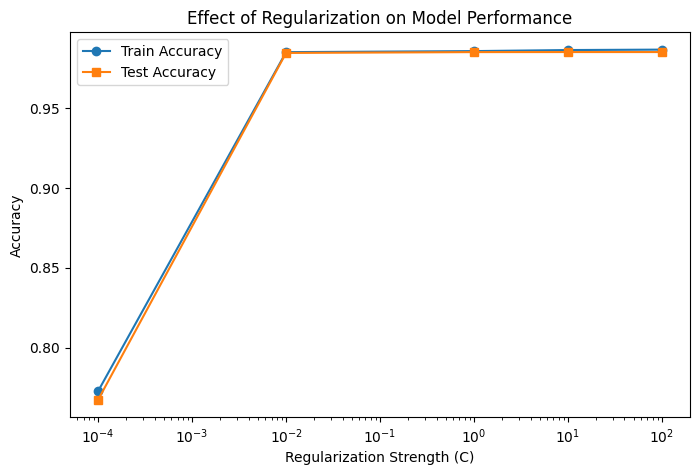

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = pd.read_csv("Flipkart Reviews Sentiment.csv")

# Ensure required columns exist
if 'Review' not in data.columns or 'sentiment' not in data.columns:
    raise ValueError("The dataset does not contain the required columns: 'Review' and 'sentiment'.")

# Feature extraction
X = data['Review']  # Text data
y = data['sentiment']  # Target variable

# Convert text to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train models with different regularization (C values)
C_values = [0.0001, 0.01, 1, 10, 100]  # Small C = High Bias (Underfitting), Large C = High Variance (Overfitting)

train_accuracies = []
test_accuracies = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=500)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"C={C} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}")

# Plot Learning Curve to detect Overfitting/Underfitting
plt.figure(figsize=(8, 5))
plt.plot(C_values, train_accuracies, marker='o', label="Train Accuracy")
plt.plot(C_values, test_accuracies, marker='s', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.title("Effect of Regularization on Model Performance")
plt.legend()
plt.show()


In [4]:
import numpy as np
import csv

# Load dataset safely
file_path = "Flipkart Reviews Sentiment.csv"

data = []
labels = []

with open(file_path, 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip header
    for row in reader:
        if len(row) < 2:  # Ensure valid row
            continue
        try:
            # Convert numeric columns, replace non-numeric values with 0
            features = [float(value) if value.replace('.', '', 1).isdigit() else 0.0 for value in row[:-1]]
            
            # Convert sentiment labels (-1, 0, 1)
            label = row[-1].strip().lower()
            if label in ["positive", "1"]:
                label = 1
            elif label in ["negative", "-1"]:
                label = 0
            elif label == "neutral":
                label = 0  # You can change this based on dataset
            else:
                continue  # Skip invalid labels
            
            data.append(features)
            labels.append(label)
        except ValueError:
            continue  # Skip invalid rows

# Convert lists to numpy arrays
if len(data) == 0:
    raise ValueError("Dataset processing resulted in an empty feature matrix. Check CSV format!")

X = np.array(data)
y = np.array(labels).reshape(-1, 1)  # Reshape for matrix operations

# Handle missing or constant columns
std_dev = np.std(X, axis=0)
valid_columns = std_dev > 0  # Avoid division by zero
X = X[:, valid_columns]  # Keep only valid columns

# Normalize features safely (avoid division by zero)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_std[X_std == 0] = 1  # Prevent division by zero
X = (X - X_mean) / X_std

# Add bias column (intercept term)
X = np.c_[np.ones(X.shape[0]), X]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5  # Small value to prevent log(0)
    cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# Gradient Descent with safeguards
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    if m == 0:
        raise ValueError("Training data is empty, cannot run gradient descent.")

    for i in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * X.T @ (h - y)
        theta -= alpha * gradient
        
    return theta

# Predict function
def predict(X, theta):
    probabilities = sigmoid(X @ theta)
    return (probabilities >= 0.5).astype(int)

# K-Fold Cross Validation
def k_fold_cross_validation(X, y, k=5, alpha=0.01, iterations=1000):
    m = X.shape[0]
    fold_size = m // k
    accuracies = []

    indices = np.arange(m)
    np.random.shuffle(indices)  # Shuffle data to ensure randomness
    X, y = X[indices], y[indices]  # Apply shuffled indices

    for fold in range(k):
        print(f"Processing Fold {fold + 1}/{k}...")

        # Splitting data into training and validation sets
        start, end = fold * fold_size, (fold + 1) * fold_size
        X_test, y_test = X[start:end], y[start:end]
        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)

        # Initialize weights
        theta = np.zeros((X_train.shape[1], 1))

        # Train model using gradient descent
        theta = gradient_descent(X_train, y_train, theta, alpha, iterations)

        # Evaluate on test set
        y_pred = predict(X_test, theta)
        accuracy = np.mean(y_pred == y_test) * 100
        accuracies.append(accuracy)

        print(f"Fold {fold + 1} Accuracy: {accuracy:.2f}%")

    print(f"\nMean Accuracy: {np.mean(accuracies):.2f}%")
    print(f"Standard Deviation: {np.std(accuracies):.2f}%")

# Run k-Fold Cross-Validation
k_fold_cross_validation(X, y, k=5, alpha=0.01, iterations=1000)


Processing Fold 1/5...
Fold 1 Accuracy: 100.00%
Processing Fold 2/5...
Fold 2 Accuracy: 100.00%
Processing Fold 3/5...
Fold 3 Accuracy: 100.00%
Processing Fold 4/5...
Fold 4 Accuracy: 100.00%
Processing Fold 5/5...
Fold 5 Accuracy: 100.00%

Mean Accuracy: 100.00%
Standard Deviation: 0.00%


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "Flipkart Reviews Sentiment.csv"

try:
    df = pd.read_csv(file_path, dtype=str)  # Read everything as string to avoid DtypeWarning
    print("Dataset loaded successfully.")
except Exception as e:
    raise ValueError(f"Error reading CSV file: {e}")

# Display dataset info
print("\nDataset Info:")
print(df.info())

# Check for duplicate rows and drop them
df.drop_duplicates(inplace=True)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Ensure dataset has enough columns
if df.shape[1] < 2:
    raise ValueError("CSV file should have at least one feature column and a label column!")

# Extract features (assuming all but last column are features)
X = df.iloc[:, :-1]

# Convert non-numeric columns to NaN, then fill missing values with 0
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Extract and encode labels
y = df.iloc[:, -1].astype(str).str.lower().str.strip()
label_mapping = {"positive": 2, "1": 2, "negative": 0, "-1": 0, "neutral": 1}

# Map labels and filter out invalid ones
y = y.map(label_mapping)
valid_rows = ~y.isna()

X = X[valid_rows]
y = y[valid_rows].astype(int)

# Check label distribution
print("\nLabel Distribution:")
print(y.value_counts())

# Convert to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

# Ensure dataset is not empty after processing
if X.shape[0] == 0:
    raise ValueError("Dataset processing resulted in an empty feature matrix. Check CSV format!")

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Use Cross Validation to prevent overfitting
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Support Vector Machine": SVC(kernel="rbf", C=1),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10),
    "Naïve Bayes": GaussianNB()
}

# Compare models using cross-validation
print("\n=== Model Comparison ===")
for name, model in models.items():
    accuracies = []
    
    for train_idx, test_idx in cv.split(X_scaled, y):
        X_train_cv, X_test_cv = X_scaled[train_idx], X_scaled[test_idx]
        y_train_cv, y_test_cv = y[train_idx], y[test_idx]
        
        model.fit(X_train_cv, y_train_cv)
        y_pred_cv = model.predict(X_test_cv)
        acc = accuracy_score(y_test_cv, y_pred_cv)
        accuracies.append(acc)

    avg_accuracy = np.mean(accuracies)
    
    print(f"\n{name} Model:")
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test, model.predict(X_test)))
    print("Confusion Matrix:\n", confusion_matrix(y_test, model.predict(X_test)))

# Hyperparameter Tuning
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "lbfgs"]
}

try:
    grid_search = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    print("\n=== Best Hyperparameters for Logistic Regression ===")
    print(grid_search.best_params_)

    best_model = grid_search.best_estimator_
    y_pred_best = best_model.predict(X_test)

    print("\nBest Logistic Regression Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred_best))
    print("Classification Report:\n", classification_report(y_test, y_pred_best))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
except Exception as e:
    print(f"Error during hyperparameter tuning: {e}")


Dataset loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154467 entries, 0 to 154466
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   154467 non-null  object
 1   product_price  154467 non-null  object
 2   Rate           154467 non-null  object
 3   Review         154467 non-null  object
 4   Summary        154467 non-null  object
 5   Sentiment      154467 non-null  object
 6   sentiment      154467 non-null  object
dtypes: object(7)
memory usage: 8.2+ MB
None

Missing Values:
product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
sentiment        0
dtype: int64

Label Distribution:
sentiment
2    119213
0     22754
Name: count, dtype: int64

=== Model Comparison ===

Logistic Regression Model:
Average Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

   


=== Logistic Regression Model Performance ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4486
           1       1.00      1.00      1.00     23908

    accuracy                           1.00     28394
   macro avg       1.00      1.00      1.00     28394
weighted avg       1.00      1.00      1.00     28394

Confusion Matrix:
 [[ 4486     0]
 [    0 23908]]


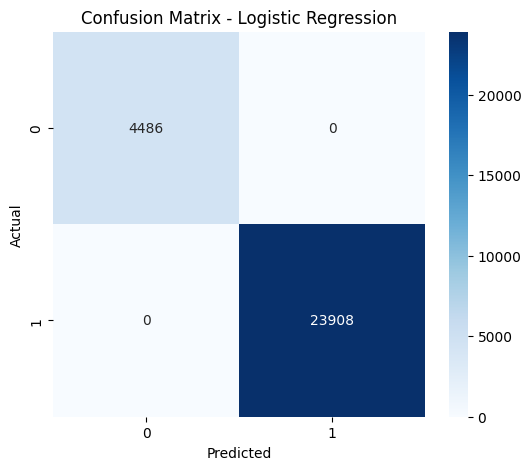

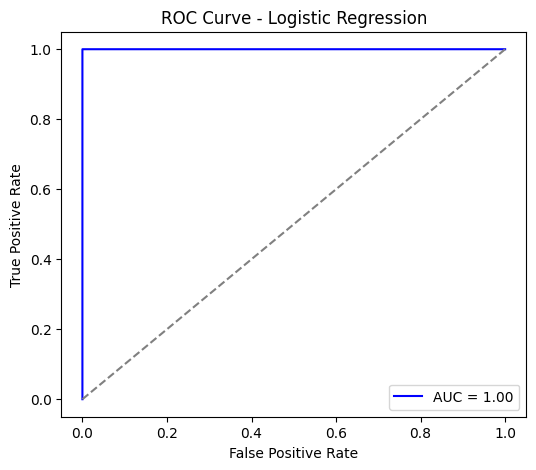

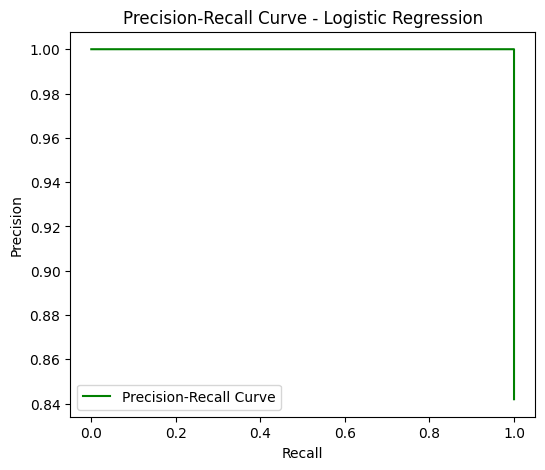

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, accuracy_score
)
import numpy as np

# Train Logistic Regression Model
log_reg = LogisticRegression(solver="liblinear")
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)
y_scores = log_reg.predict_proba(X_test)[:, 1]  # Probability for positive class

# Print Performance Metrics
print("\n=== Logistic Regression Model Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - Logistic Regression")
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_test, y_scores):
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve - Logistic Regression")
    plt.legend()
    plt.show()

# Function to plot precision-recall curve
def plot_precision_recall(y_test, y_scores):
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, color="green", label="Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve - Logistic Regression")
    plt.legend()
    plt.show()

# Call Plotting Functions
plot_confusion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_scores)
plot_precision_recall(y_test, y_scores)


In [1]:
import joblib
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load dataset
data = pd.read_csv("Flipkart Reviews Sentiment.csv")

# Ensure required columns exist
if 'Review' not in data.columns or 'sentiment' not in data.columns:
    raise ValueError("Dataset must contain 'Review' and 'sentiment' columns.")

# Feature extraction
X = data['Review']
y = data['sentiment']

# Convert text to numerical data using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save model and vectorizer
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")

print("Model and vectorizer saved successfully.")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3084\2733390351.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Flipkart Reviews Sentiment.csv")


Model and vectorizer saved successfully.
